In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv("district wise rainfall normal.csv")

#data exploration
print(data.head())
print(data.info())
print(data.describe())

                 STATE_UT_NAME       DISTRICT    JAN   FEB    MAR    APR  \
0  ANDAMAN And NICOBAR ISLANDS        NICOBAR  107.3  57.9   65.2  117.0   
1  ANDAMAN And NICOBAR ISLANDS  SOUTH ANDAMAN   43.7  26.0   18.6   90.5   
2  ANDAMAN And NICOBAR ISLANDS  N & M ANDAMAN   32.7  15.9    8.6   53.4   
3            ARUNACHAL PRADESH          LOHIT   42.2  80.8  176.4  358.5   
4            ARUNACHAL PRADESH     EAST SIANG   33.3  79.5  105.9  216.5   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0  358.5  295.5  285.0  271.9  354.8  326.0  315.2  250.9  2805.2    165.2   
1  374.4  457.2  421.3  423.1  455.6  301.2  275.8  128.3  3015.7     69.7   
2  343.6  503.3  465.4  460.9  454.8  276.1  198.6  100.0  2913.3     48.6   
3  306.4  447.0  660.1  427.8  313.6  167.1   34.1   29.8  3043.8    123.0   
4  323.0  738.3  990.9  711.2  568.0  206.9   29.5   31.7  4034.7    112.8   

   Mar-May  Jun-Sep  Oct-Dec  
0    540.7   1207.2    892.1  
1    483.5  

In [ ]:
print(data.isnull().sum())

STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64


In [ ]:
#data preprocessing

In [ ]:
data.fillna(method='ffill', inplace=True)

In [ ]:
for month in ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']:
  data [month + "_rain"] = data[month].apply(lambda x:1 if x > 0 else 0)

  #created a binary target column for each month

In [ ]:
#target variable

In [ ]:
target = "JAN_rain"

In [ ]:
#feature

In [ ]:
features = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']



In [ ]:
astype('category')

In [ ]:
print(type(features))

<class 'list'>


In [ ]:
#data mining

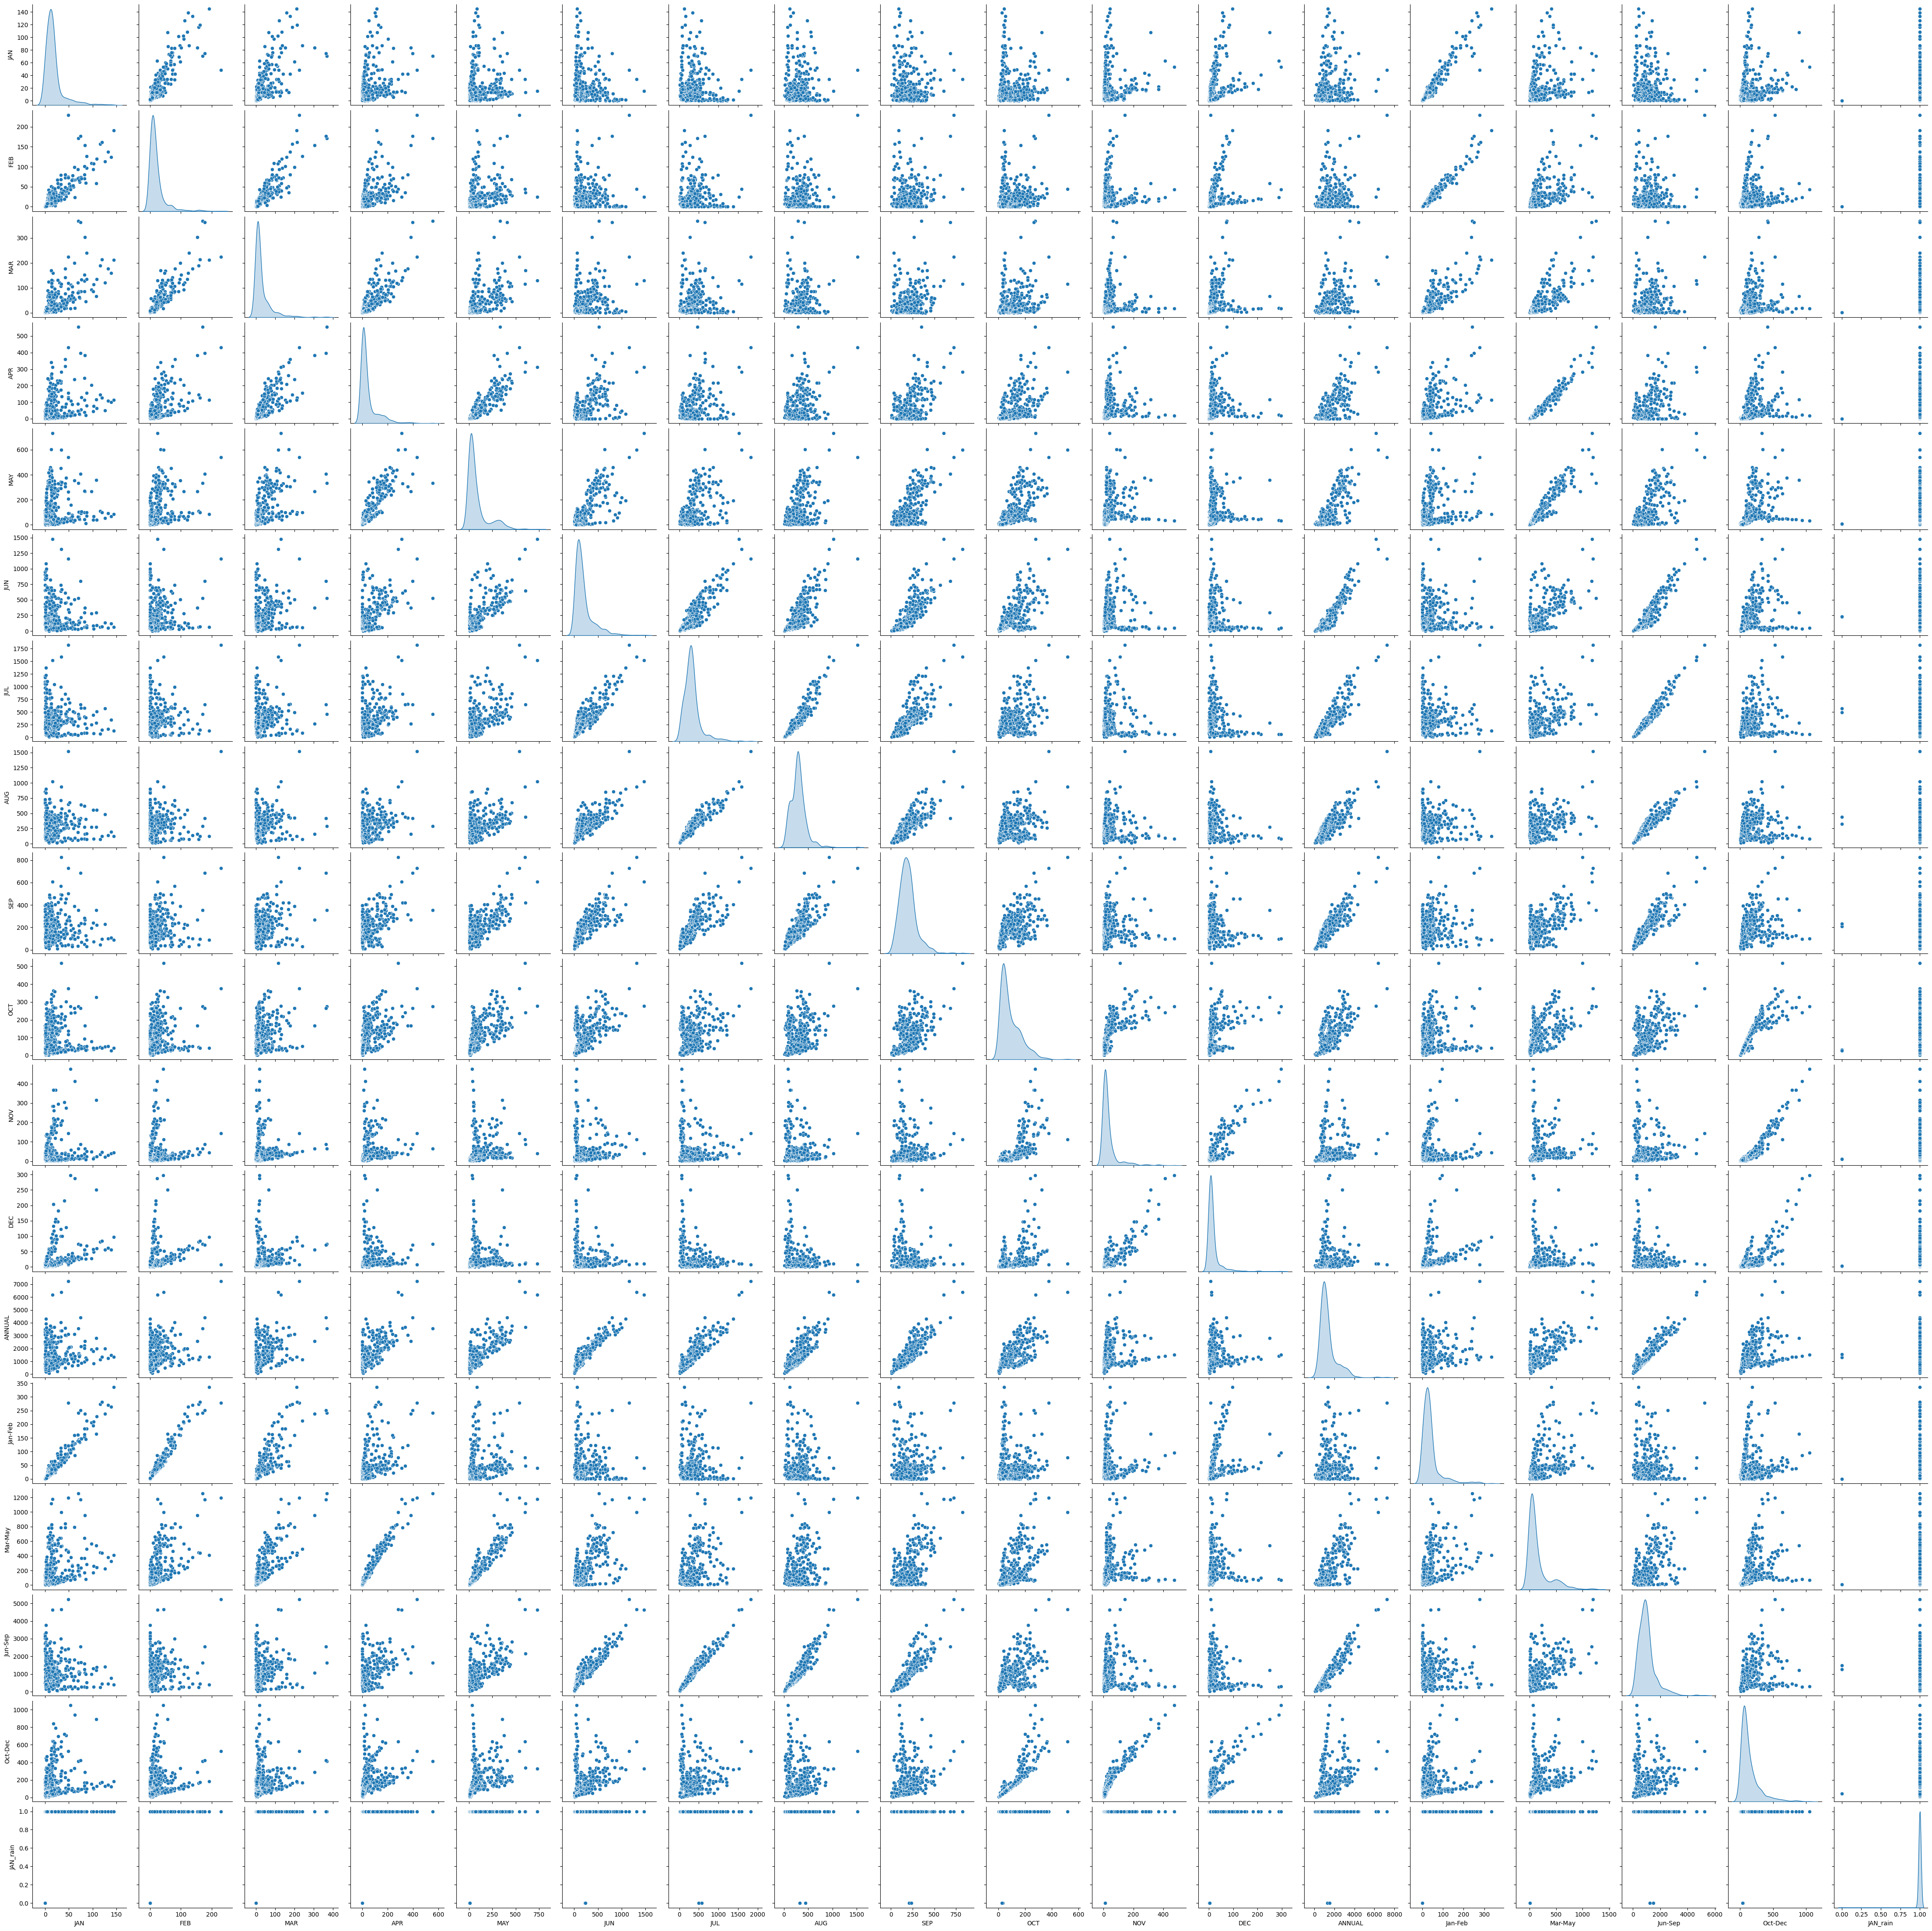

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#paireplot for selected features
sns.pairplot(data[features + [target]], diag_kind='kde')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Prepare the data
X = data[features]
Y = data[target]

#split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

#preprocessing and model pipeline
pipeline = Pipeline(steps =[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

#hyperpatmeter tuning
param_grid = {
    'classifier__n_estimators' : [100, 200],
    'classifier__max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring= 'accuracy')
grid_search.fit(X_train, Y_train)

#best model
best_model = grid_search.best_estimator_

#predictions
y_pred = best_model.predict(X_test)

#evaluation
print("accuracy: ", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

KeyError: "None of [Index([ 285.0,  421.3,  465.4,  660.1,  990.9,  217.4,  851.9,  660.1,  272.0,\n        460.8,\n       ...\n        792.9,  595.4,  398.0,  772.9,  228.9,  788.9, 1108.5,  539.9, 1110.4,\n        287.7],\n      dtype='float64', length=641)] are in the [columns]"

In [ ]:
# Define features and target
# Example: predicting rainfall in July
target_month = 'JUL'

# Drop the 'STATE_UT_NAME', 'DISTRICT', and target month columns
features1 = data.drop(columns=['STATE_UT_NAME', 'DISTRICT', target_month])

# Check if the 'JUL' column exists in the features DataFrame
if 'JUL' not in features1.columns:
    # Add the 'JUL' column to the features DataFrame
    features1['JUL'] = data['JUL']

# Convert month columns to categorical
month_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
for month in month_columns:
    features1[month] = features1[month].astype('category')

# Define target
target = data[target_month]
print(target)

0       285.0
1       421.3
2       465.4
3       660.1
4       990.9
        ...  
636     788.9
637    1108.5
638     539.9
639    1110.4
640     287.7
Name: JUL, Length: 641, dtype: float64


In [ ]:
#validation

from sklearn.model_selection import cross_val_score

#Cross-validation
cv_scores = cross_val_score(best_model, X, Y, cv =10)

print("scross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())
